In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [117]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [118]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
# checking null data
for col in df_train.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:     Survived	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 19.87%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 0.00%
column:         Fare	 Percent of NaN value: 0.00%
column:        Cabin	 Percent of NaN value: 77.10%
column:     Embarked	 Percent of NaN value: 0.22%


In [122]:
# checking null data
for col in df_test.columns:
    msg = 'column: {:>12}\t Percent of NaN value: {:.2f}%'.format(
        col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column:  PassengerId	 Percent of NaN value: 0.00%
column:       Pclass	 Percent of NaN value: 0.00%
column:         Name	 Percent of NaN value: 0.00%
column:          Sex	 Percent of NaN value: 0.00%
column:          Age	 Percent of NaN value: 20.57%
column:        SibSp	 Percent of NaN value: 0.00%
column:        Parch	 Percent of NaN value: 0.00%
column:       Ticket	 Percent of NaN value: 0.00%
column:         Fare	 Percent of NaN value: 0.24%
column:        Cabin	 Percent of NaN value: 78.23%
column:     Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

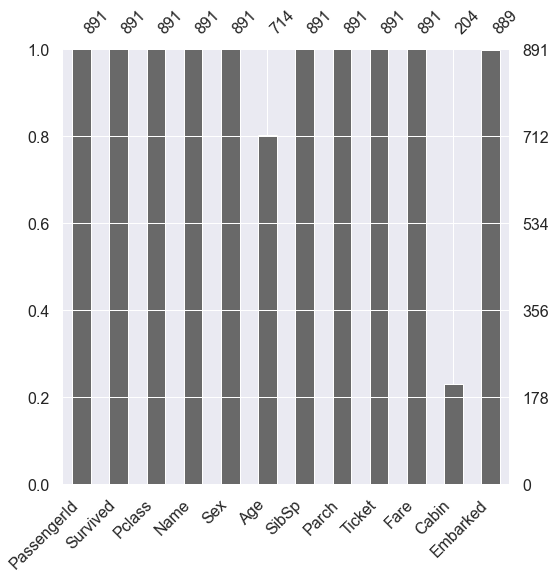

In [123]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8))

<AxesSubplot:>

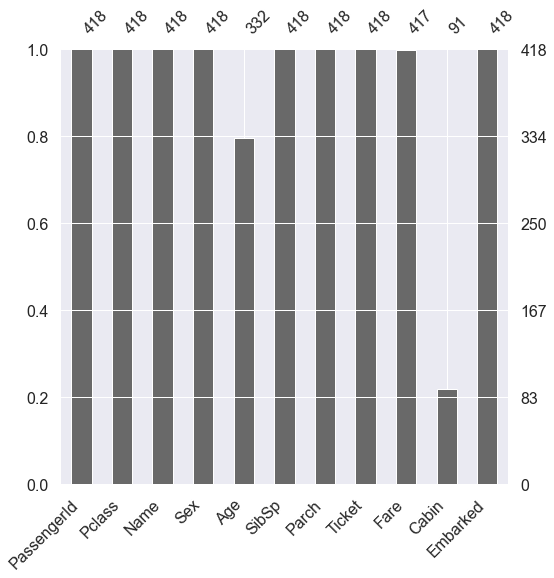

In [124]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8))

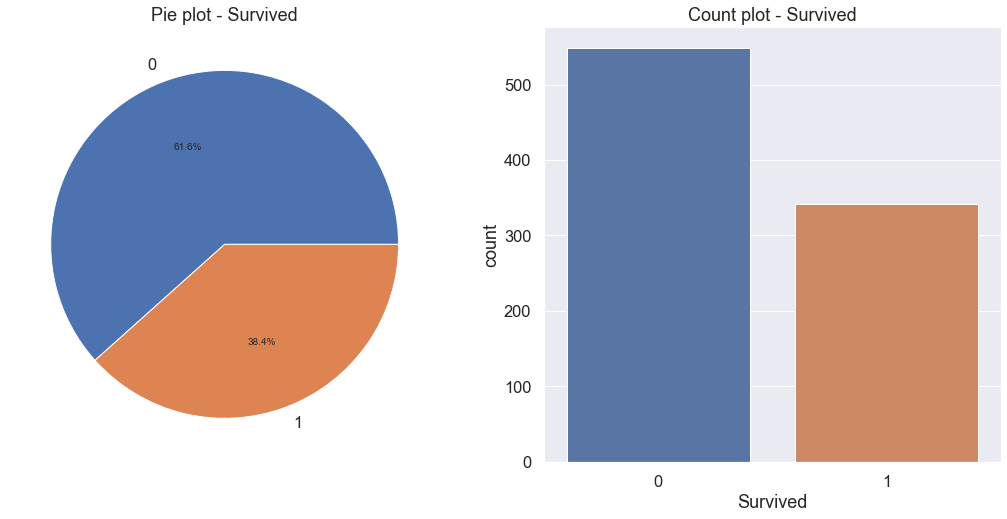

In [125]:
# targe label check
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [126]:
# both survived and dead
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [127]:
# only servived
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:xlabel='Pclass'>

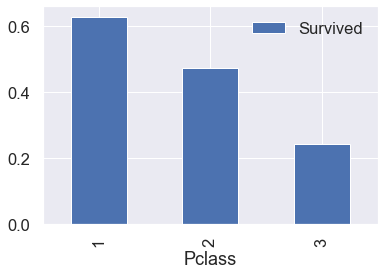

In [128]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], 
                                         as_index=True).mean().sort_values(by='Survived', 
                                                                           ascending=False).plot.bar()

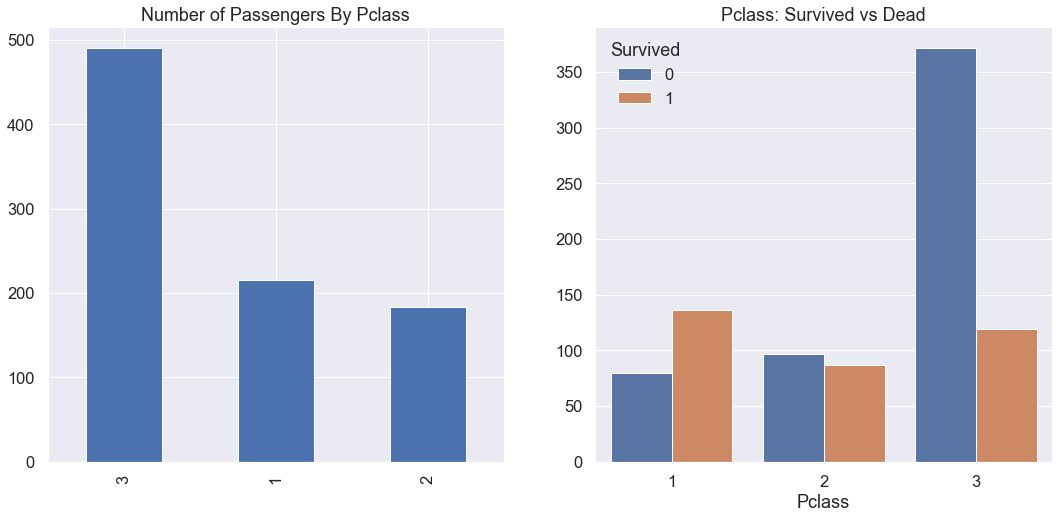

In [129]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
ax[1].set_ylabel('')

plt.show()

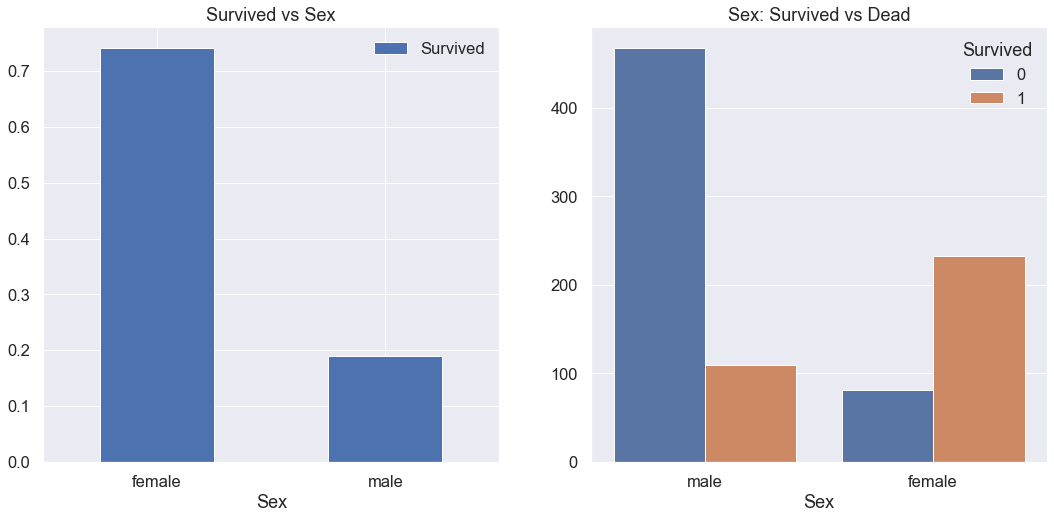

In [130]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0], rot=0)
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
ax[1].set_ylabel('')

plt.show()

In [131]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


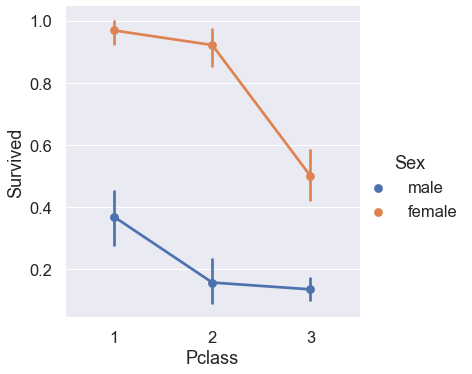

In [132]:
# both Sex and Pclass
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

In [133]:
# Age
print('The oldest passanger : {:.1f} Years'.format(df_train.Age.max()))
print('The youngest passanger : {:.1f} Years'.format(df_train.Age.min()))
print('Mean of Age : {:.1f} Years'.format(df_train.Age.mean()))

The oldest passanger : 80.0 Years
The youngest passanger : 0.4 Years
Mean of Age : 29.7 Years


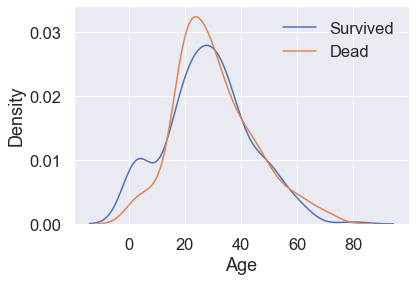

In [134]:
sns.kdeplot(df_train[df_train.Survived == 1].Age)
sns.kdeplot(df_train[df_train.Survived == 0].Age)
plt.legend(['Survived', 'Dead'])
plt.show()

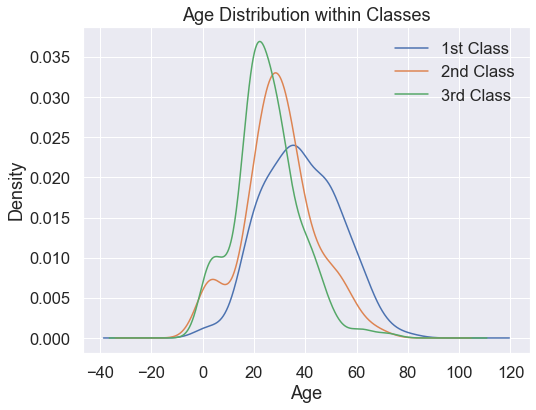

In [135]:
# Age distribution within classes
plt.figure(figsize=(8,6))
df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

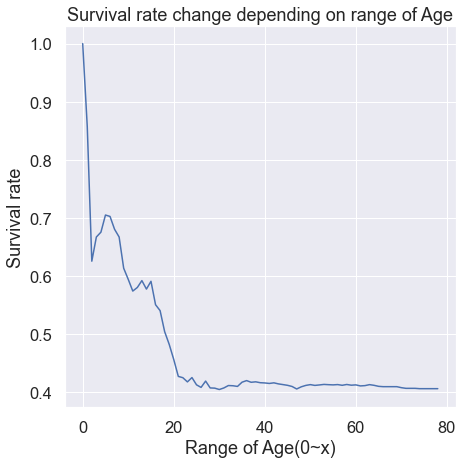

In [136]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train.Age < i].Survived.sum()/len(df_train[df_train.Age < i].Survived))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

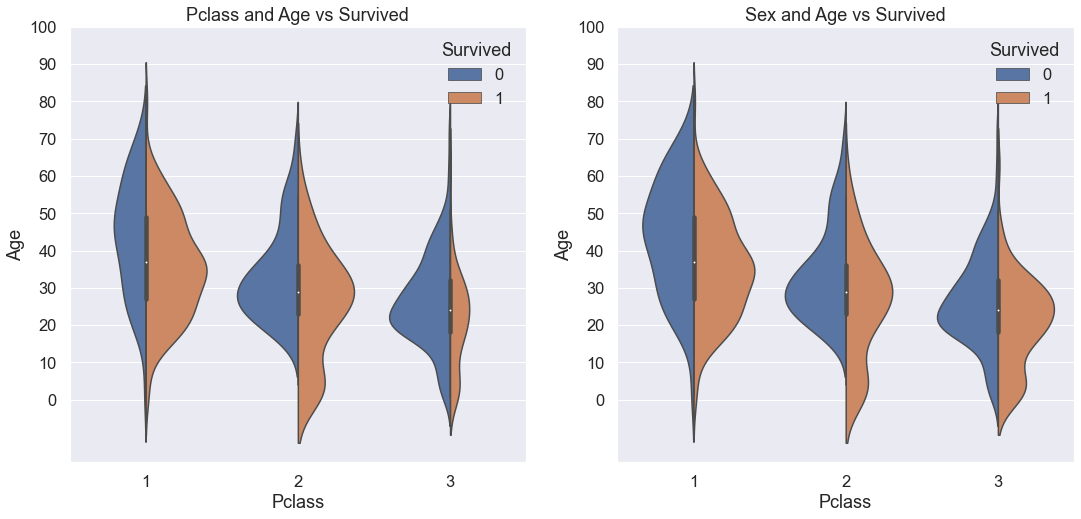

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

<AxesSubplot:xlabel='Embarked'>

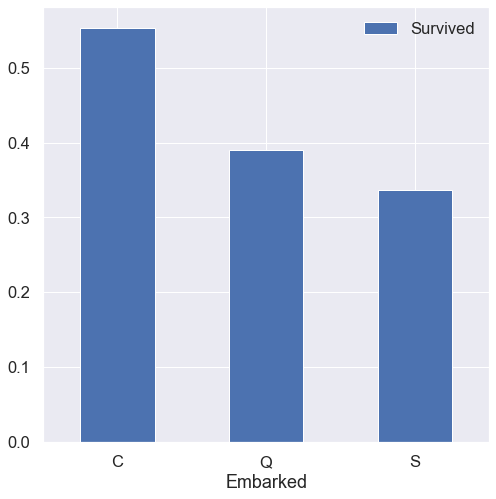

In [138]:
# Embarked
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(
    by='Survived', ascending=False).plot.bar(rot=0, figsize=(8,8))

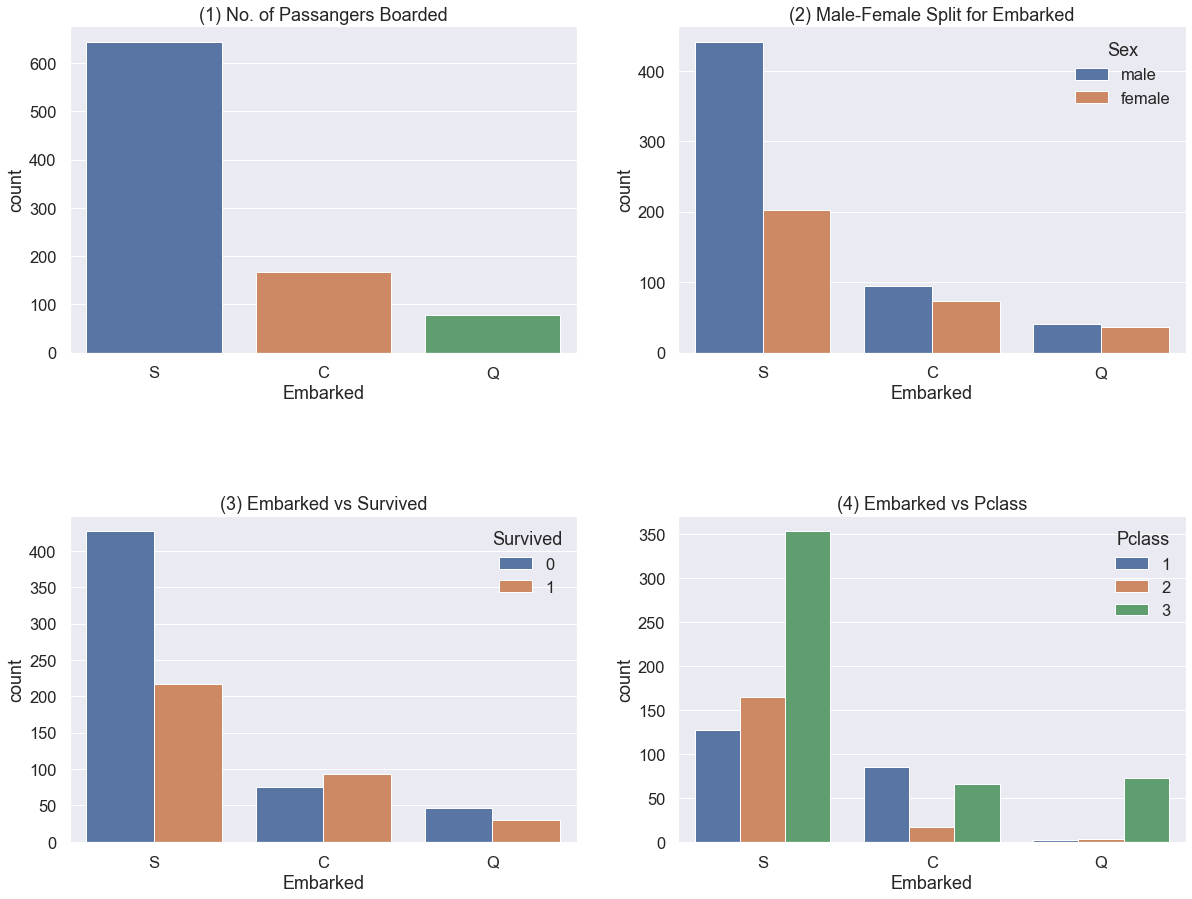

In [139]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passangers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [140]:
# Family = SibSp + Parch
df_train['FamilySize'] = df_train.SibSp + df_train.Parch + 1 
df_test['FamilySize'] = df_test.SibSp + df_test.Parch + 1

In [141]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [142]:
print('Maximum size of Family: ', df_train.FamilySize.max())
print('Minimum size of Family: ', df_train.FamilySize.min())
print('Mean size of Family: ', df_train.FamilySize.mean())

Maximum size of Family:  11
Minimum size of Family:  1
Mean size of Family:  1.904601571268238


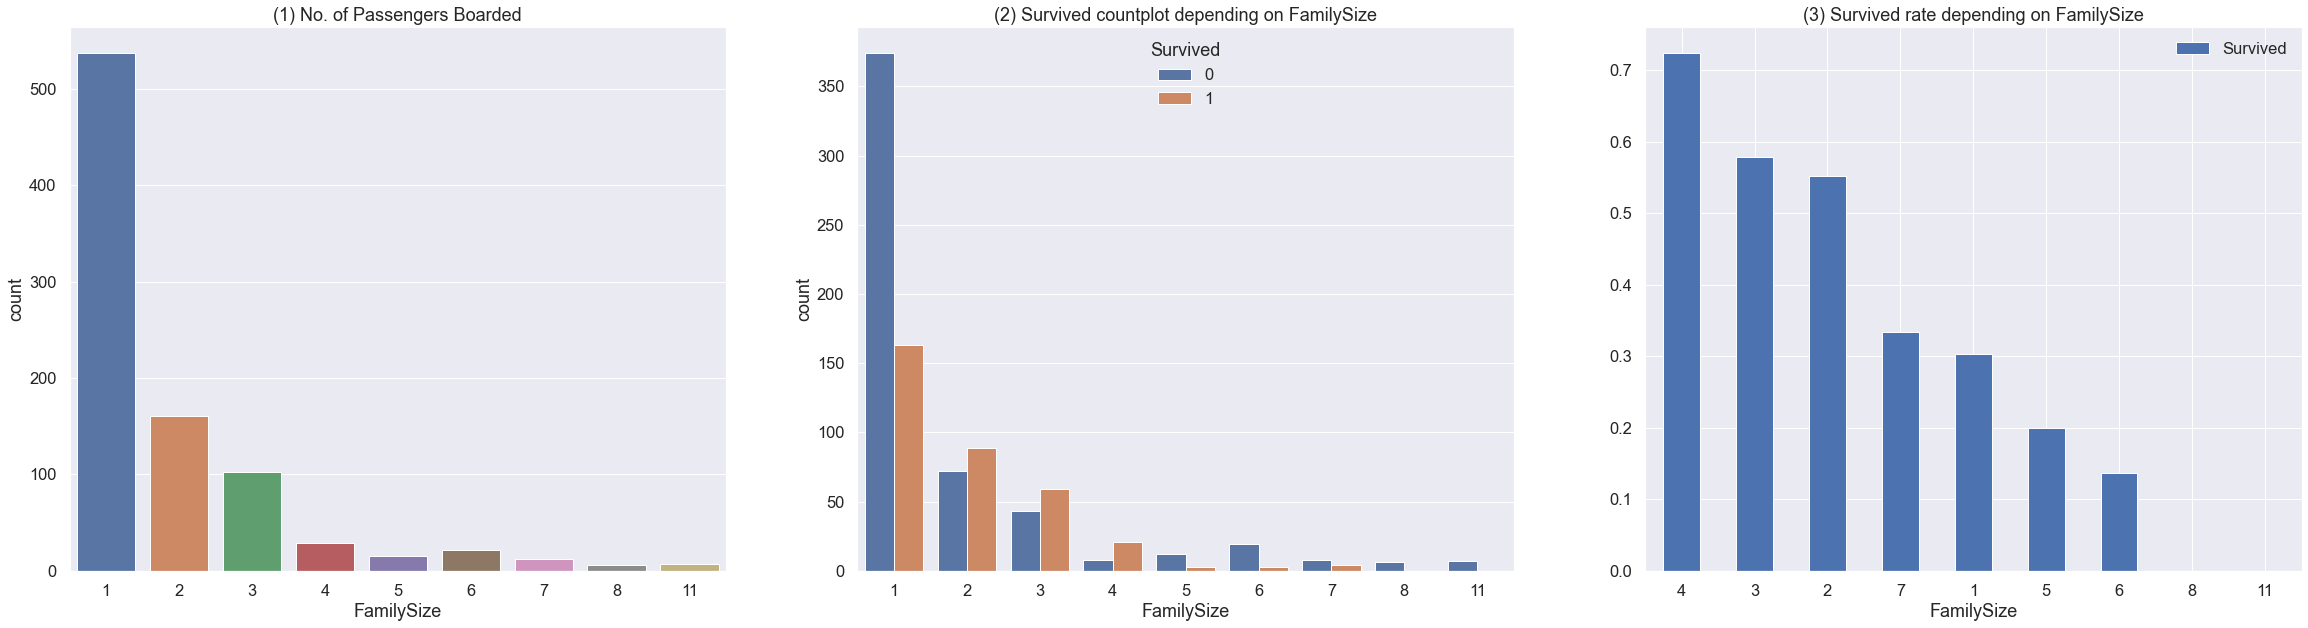

In [143]:
fig, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                                             as_index=True).mean().sort_values(by='Survived',
                                                                              ascending=False).plot.bar(ax=ax[2], rot=0)
ax[2].set_title('(3) Survived rate depending on FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Density'>

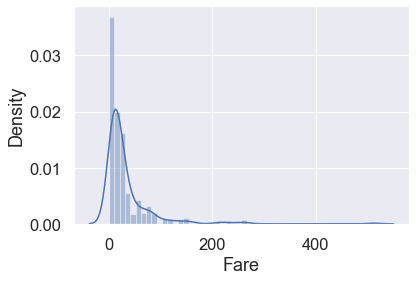

In [144]:
# Fare
sns.distplot(df_train['Fare'])

In [145]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # replace NaN value with mean value 

In [146]:
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x>0 else 0)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

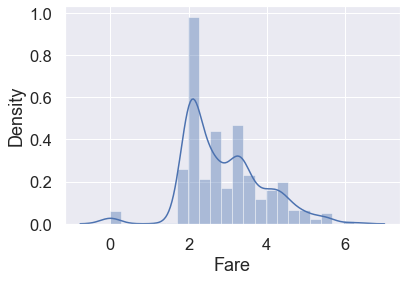

In [147]:
sns.distplot(df_train['Fare'])

In [148]:
# fill age null values
df_train.Age.mean()

29.69911764705882

In [151]:
df_train.loc[df_train.Age.isnull(),'Age'] = 29.7

In [157]:
# fill null in Embarked
print('There are', df_train['Embarked'].isnull().sum(), 'Null Values in Embarked feature')

There are 2 Null Values in Embarked feature


In [160]:
df_train['Embarked'].fillna('S', inplace=True)

In [166]:
# change Age (continuous to categorical)
def categorize_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [167]:
df_train['Age_cat'] = df_train['Age'].apply(categorize_age)
df_test['Age_cat'] = df_test['Age'].apply(categorize_age)

In [170]:
df_train.drop('Age', axis=1, inplace=True)
df_test.drop('Age', axis=1, inplace=True)

In [172]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [176]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,0,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,2,2,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,2,1,3


In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})